<a href="https://colab.research.google.com/github/mobadata/detection-nouveautes-avis/blob/main/Detection_nouveautes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importons les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("punkt")
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# Montons note Google drive dans le notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importation des données

# Chemin du fichier JSON dans le drive
chemin_fichier = "/content/drive/MyDrive/mon_projet_nouveautes/Electronics_5.json"

# Chargement du fichier (format JSON lignes si Amazon)
df = pd.read_json(chemin_fichier, lines=True)

# Affichage des premières lignes
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [ ]:

# infos sur les variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [ ]:
# Apercu statistique des données
df.describe(include='all')


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,1689188,1689188,1664458,1689188,1689188,1.689188e+06,1689188,1.689188e+06,1689188
unique,192403,63001,162859,8331,1687169,NaN,1139738,NaN,5277
top,ADLVFFE4VBT8,B007WTAJTO,Amazon Customer,"[0, 0]",,NaN,Works great,NaN,"01 7, 2014"
freq,431,4915,26961,963227,1071,NaN,6784,NaN,3051
mean,NaN,NaN,NaN,NaN,NaN,4.222779e+00,NaN,1.340571e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,1.185632e+00,NaN,6.342451e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,9.292320e+08,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000e+00,NaN,1.318118e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,NaN,1.360800e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,NaN,1.385078e+09,NaN


In [ ]:
df["reviewText"].head(10)


,reviewText
0,We got this GPS for my husband who is an (OTR)...
1,"I'm a professional OTR truck driver, and I bou..."
2,"Well, what can I say. I've had this unit in m..."
3,"Not going to write a long review, even thought..."
4,I've had mine for a year and here's what we go...
5,I am using this with a Nook HD+. It works as d...
6,The cable is very wobbly and sometimes disconn...
7,This adaptor is real easy to setup and use rig...
8,This adapter easily connects my Nook HD 7&#34;...
9,This product really works great but I found th...


In [ ]:
# Nettoyage des données
stop_words = set(stopwords.words('english'))

def nettoyer_texte(texte):
    if isinstance(texte, str):
        texte = texte.lower()  # Met en minuscule
        texte = re.sub(r"[^a-z\s]", "", texte)  # Supprime les caractères non alphabétiques
        tokens = word_tokenize(texte)  # Tokenisation
        mots_utiles = [mot for mot in tokens if mot not in stop_words]  # Supprime les stopwords
        return " ".join(mots_utiles)
    else:
        return ""

In [ ]:
# On applique la fonction sur la variable reviewText
df["review_clean"] = df["reviewText"].apply(nettoyer_texte)
df[["reviewText", "review_clean"]].head()

,reviewText,review_clean
0,We got this GPS for my husband who is an (OTR)...,got gps husband otr road trucker impressed shi...
1,"I'm a professional OTR truck driver, and I bou...",im professional otr truck driver bought tnd tr...
2,"Well, what can I say. I've had this unit in m...",well say ive unit truck four days prior garmin...
3,"Not going to write a long review, even thought...",going write long review even thought unit dese...
4,I've had mine for a year and here's what we go...,ive mine year heres got tries route non truck ...


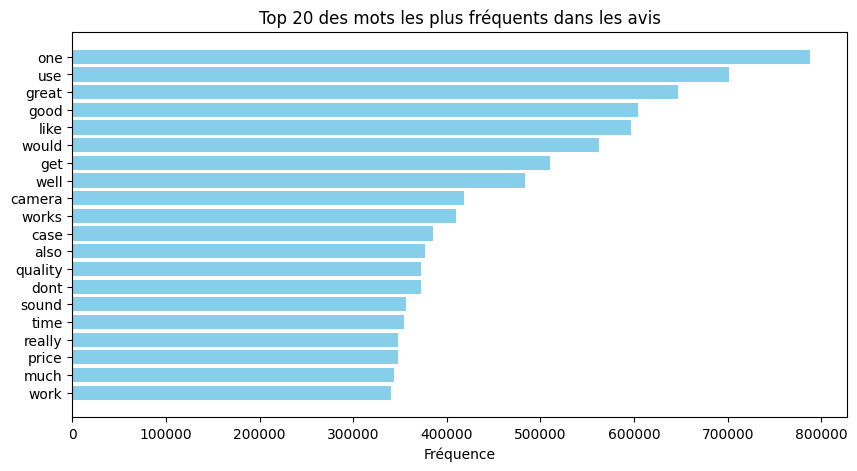

In [ ]:

# Récupérer tous les mots des textes nettoyés
tous_les_mots = " ".join(df["review_clean"]).split()

# Compter la fréquence des mots
freq = Counter(tous_les_mots)

# Top 20
top_mots = freq.most_common(20)
mots, counts = zip(*top_mots)

# Affichage
plt.figure(figsize=(10, 5))
plt.barh(mots, counts, color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 20 des mots les plus fréquents dans les avis")
plt.xlabel("Fréquence")
plt.show()


In [ ]:
!pip install bertopic umap-learn hdbscan sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 845.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
# échantillon de 10000 avis pour tester
df_sample = df.sample(n=10000, random_state=42)

In [ ]:
# Création et ajustement du modèle BERTopic
from bertopic import BERTopic
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(df_sample["review_clean"])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info().head(10)  # Affiche les 10 thèmes les plus fréquents


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2934,-1_cable_one_works_great,"[cable, one, works, great, use, usb, drive, so...",[upgraded iphone january already owned ipod to...
1,0,513,0_headphones_ear_sound_ears,"[headphones, ear, sound, ears, headset, bass, ...",[read review probably remember much gushing vm...
2,1,469,1_product_item_price_works,"[product, item, price, works, great, good, bou...",[excellent product better expected great quali...
3,2,289,2_camera_pictures_cameras_zoom,"[camera, pictures, cameras, zoom, video, shoot...",[owned nikone many years served well course sh...
4,3,264,3_card_reader_cards_memory,"[card, reader, cards, memory, sandisk, sd, gb,...",[purchased make easier transfer pictures sd ca...
5,4,200,4_protector_screen_bubbles_dust,"[protector, screen, bubbles, dust, film, prote...",[others commented unless youre hospital surger...
6,5,194,5_mouse_scroll_wheel_mice,"[mouse, scroll, wheel, mice, logitech, click, ...","[good little mouse laptop, mouse works great p..."
7,6,178,6_speakers_sub_subwoofer_sound,"[speakers, sub, subwoofer, sound, bass, amp, s...",[quick take like design need desktop speaker s...
8,7,161,7_lens_mm_focus_lenses,"[lens, mm, focus, lenses, sharp, tamron, sigma...",[want one lens carry sigma mm lens nikon camer...
9,8,161,8_keyboard_keys_key_typing,"[keyboard, keys, key, typing, keyboards, mouse...",[bought replace wireless keyboard problems usi...


In [ ]:
topic_model.get_topic(1)


[('product', np.float64(0.021037045452008688)),
 ('item', np.float64(0.018966993513853083)),
 ('price', np.float64(0.017071306425188476)),
 ('works', np.float64(0.015677815137177985)),
 ('great', np.float64(0.013976709020351648)),
 ('good', np.float64(0.013552662016416474)),
 ('bought', np.float64(0.012825515531053622)),
 ('working', np.float64(0.012018033947736631)),
 ('buy', np.float64(0.011700512598400877)),
 ('time', np.float64(0.010711108707026644))]

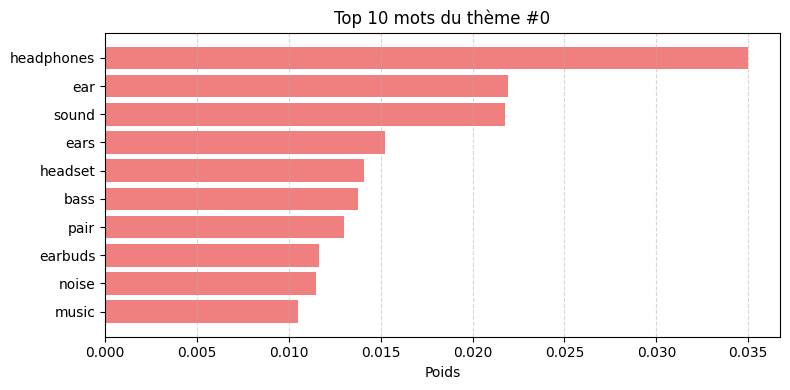

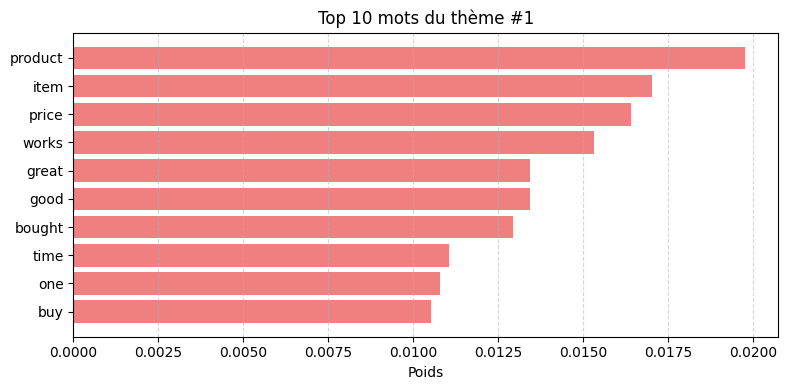

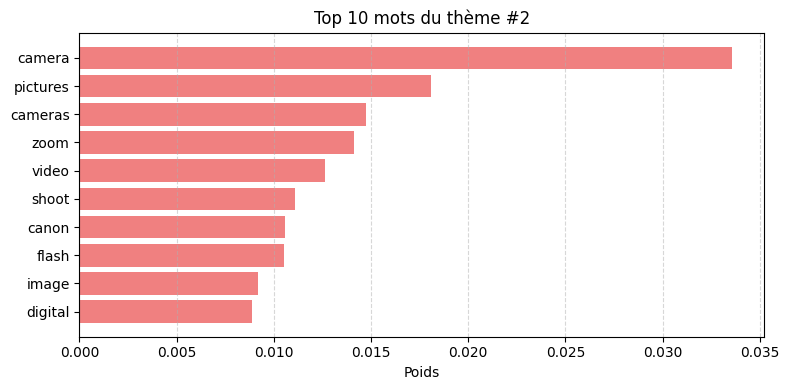

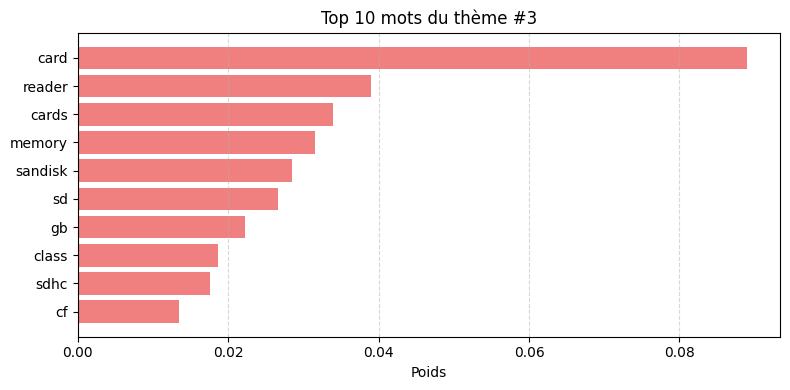

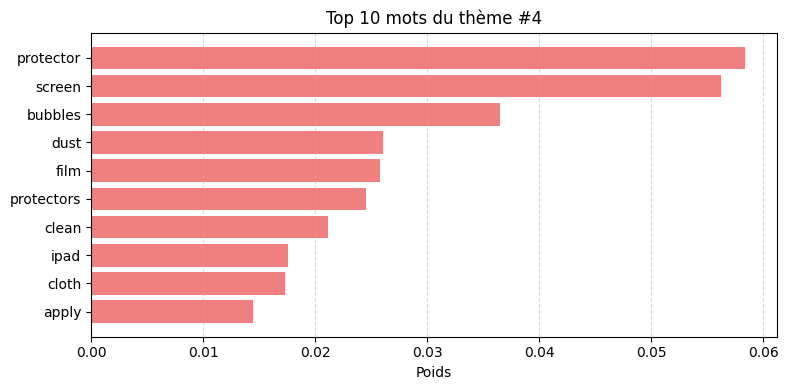

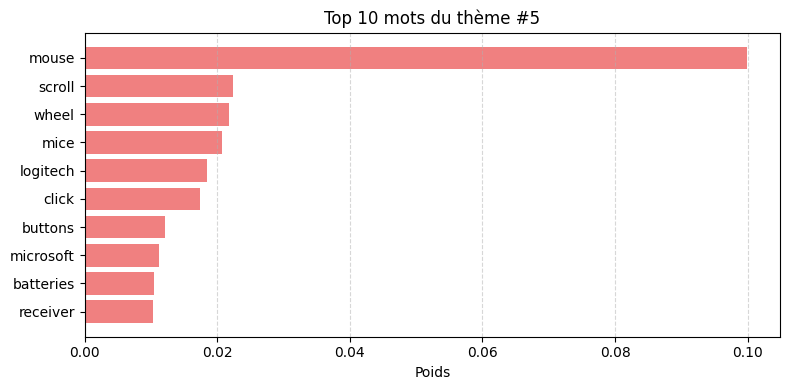

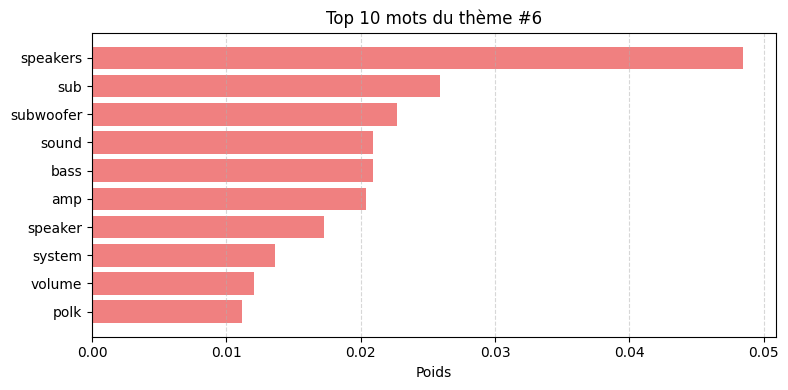

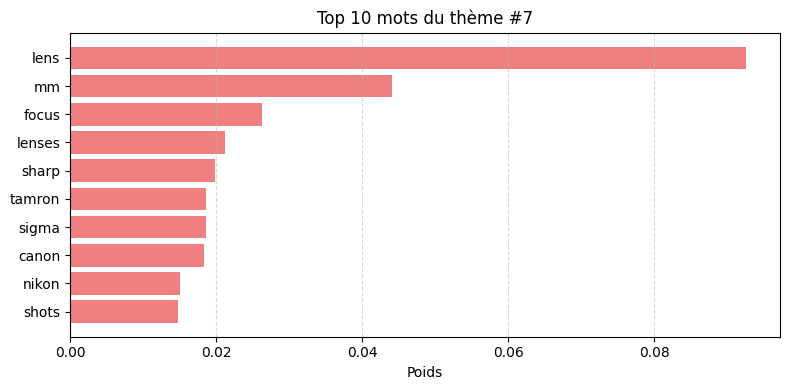

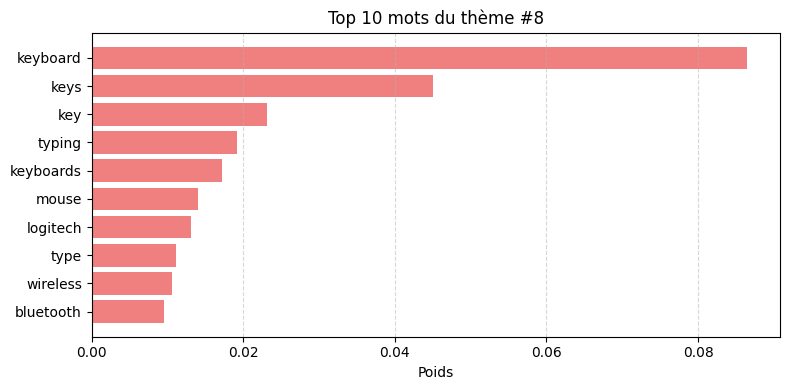

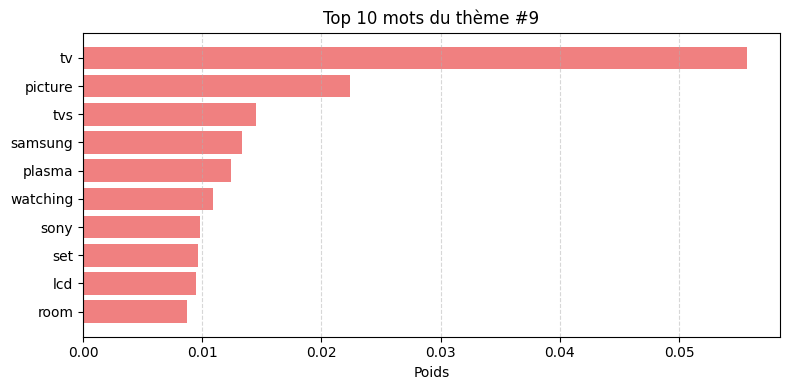

In [ ]:
for i in range(10):  # Afficher les 10 premiers topics
    topic_keywords = topic_model.get_topic(i)
    mots = [mot for mot, _ in topic_keywords]
    scores = [score for _, score in topic_keywords]

    plt.figure(figsize=(8, 4))
    plt.barh(mots[:10][::-1], scores[:10][::-1], color="lightcoral")
    plt.xlabel("Poids")
    plt.title(f"Top 10 mots du thème #{i}")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# Visualisation interactive des thèmes
topic_model.visualize_topics()


In [ ]:
df_sample["reviewTime"] = pd.to_datetime(df_sample["reviewTime"])


In [ ]:
df_sample = df_sample.reset_index(drop=True)

In [ ]:
topics_over_time = topic_model.topics_over_time(
    docs=df_sample["review_clean"],
    topics=topics,
    timestamps=df_sample["reviewTime"],
    nr_bins=20,         # nombre de périodes (tu peux l’ajuster)
    evolution_tuning=True
)


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time)


In [ ]:
df_sample["topic"] = topics
df_sample["probability"] = probs

In [ ]:
df_sample["month"] = df_sample["reviewTime"].dt.to_period("M")
# Filtrer les avis récents (dernier mois)
latest_month = df_sample["month"].max()
recent_topics = df_sample[df_sample["month"] == latest_month]["topic"].value_counts()

# Filtrer les avis anciens (6 mois avant)
old_month = latest_month - 6
old_topics = df_sample[df_sample["month"] == old_month]["topic"].value_counts()

# Comparer les tendances
new_topics = set(recent_topics.index) - set(old_topics.index)
print(f"🆕 Nouveaux thèmes apparus ce mois-ci : {new_topics}")


🆕 Nouveaux thèmes apparus ce mois-ci : {96, 33, 98, 102, 106, 43, 107, 82, 55}


In [ ]:
for topic_id in [96, 33, 98, 102, 106, 43, 107, 82, 55]:
    print(f"\nTopic {topic_id}:")
    print(topic_model.get_topic(topic_id))



Topic 96:
[('hdmi', np.float64(0.06926600345594817)), ('switcher', np.float64(0.06115599641592105)), ('switch', np.float64(0.05362826051072307)), ('switching', np.float64(0.03513050883479065)), ('remote', np.float64(0.03007844966979749)), ('input', np.float64(0.028840588100158496)), ('connected', np.float64(0.02704349770090809)), ('automatically', np.float64(0.02551713636373558)), ('inputs', np.float64(0.024455101169517865)), ('tv', np.float64(0.023776807368534134))]

Topic 33:
[('router', np.float64(0.04743648523028113)), ('signal', np.float64(0.03482564539448374)), ('wireless', np.float64(0.0343529379777246)), ('house', np.float64(0.023338666447143785)), ('wifi', np.float64(0.02249636089538811)), ('repeater', np.float64(0.018104875574068355)), ('range', np.float64(0.014750862942781565)), ('internet', np.float64(0.014405327118457864)), ('network', np.float64(0.014201159693847457)), ('strength', np.float64(0.013149736663871757))]

Topic 98:
[('ya', np.float64(0.9709078095034261)), ('a

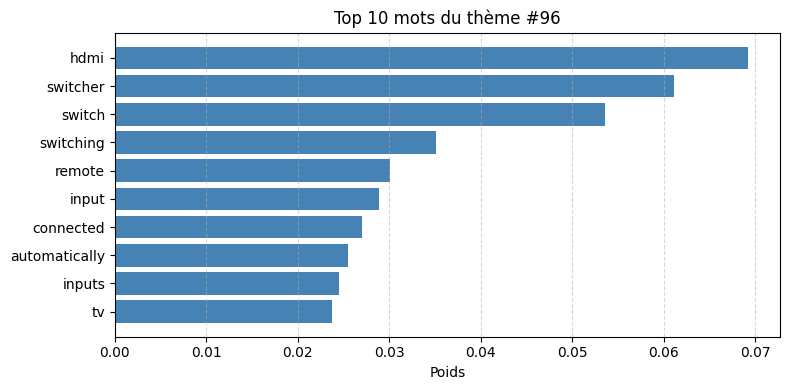

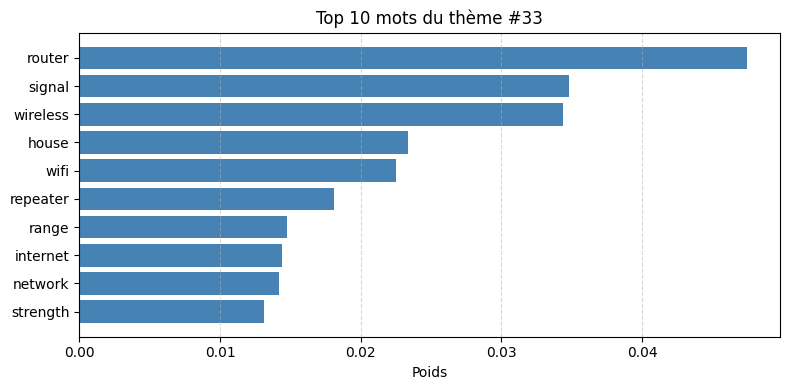

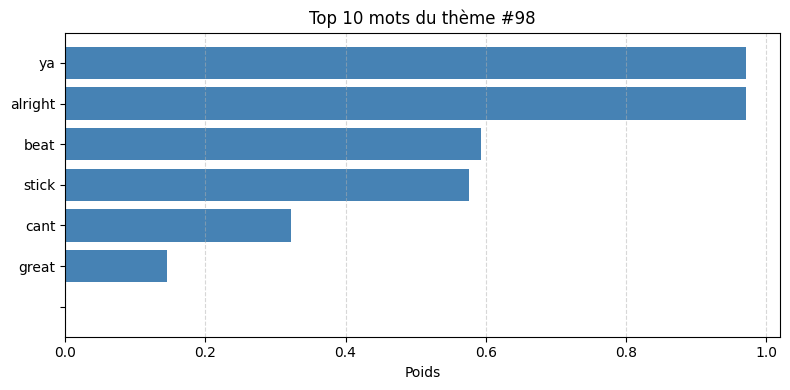

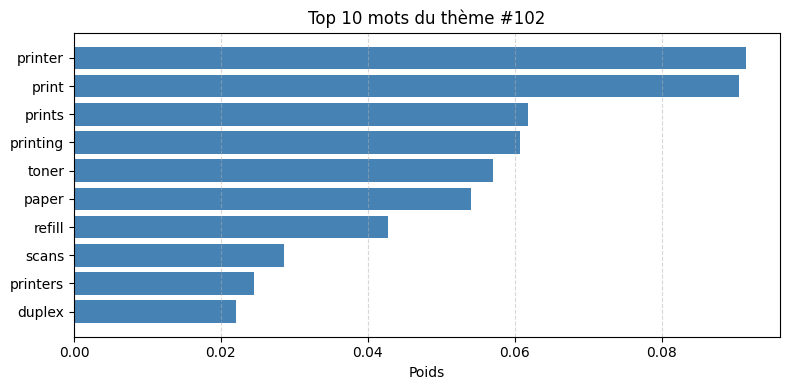

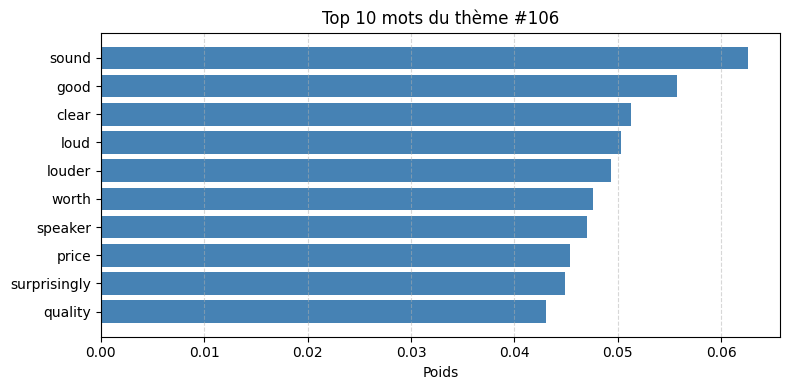

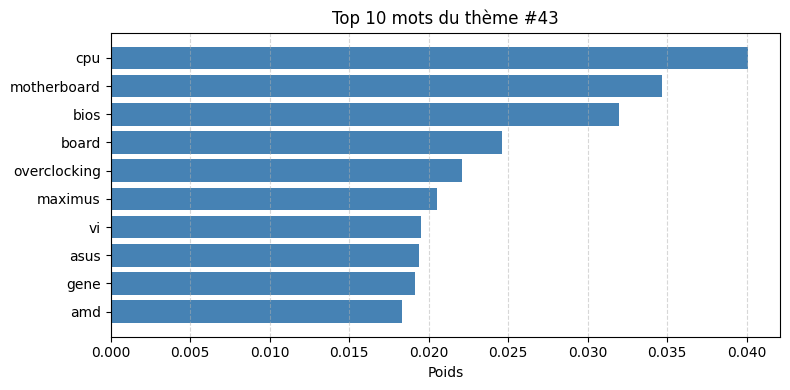

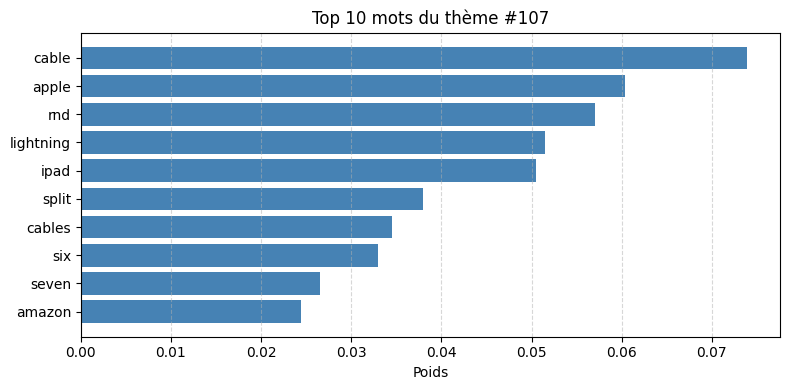

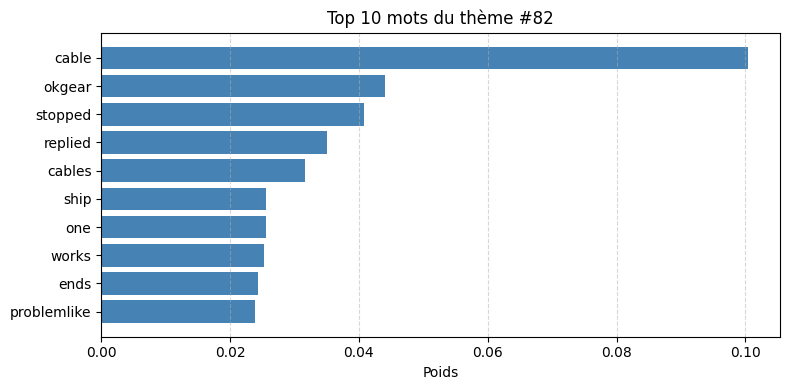

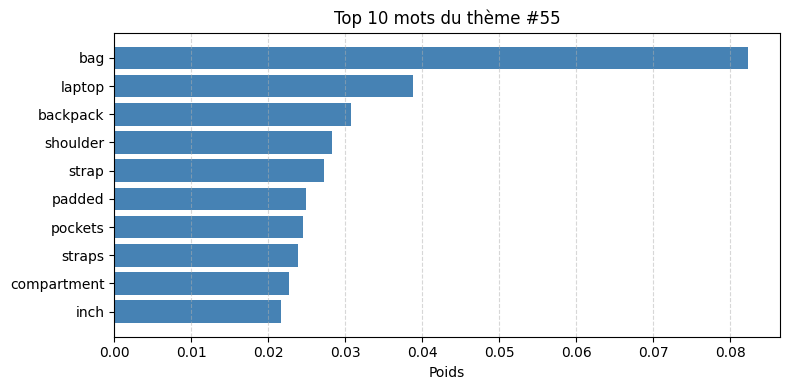

In [ ]:
for topic_id in new_topics:
    # Récupérer les mots et leurs poids
    topic_words = topic_model.get_topic(topic_id)
    if topic_words:  # vérifie que le topic n'est pas vide
        mots = [mot for mot, _ in topic_words][:10]
        scores = [score for _, score in topic_words][:10]

        # Graphique
        plt.figure(figsize=(8, 4))
        plt.barh(mots[::-1], scores[::-1], color="steelblue")
        plt.xlabel("Poids")
        plt.title(f"Top 10 mots du thème #{topic_id}")
        plt.grid(axis="x", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Topic {topic_id} est vide.")


In [ ]:
for topic_id in [96, 33, 98, 102, 106, 43, 107, 82, 55]:
    print(f"\nExemples pour Topic {topic_id}:\n")
    docs = df[df["topic"] == topic_id]["review"].head(3).tolist()
    for doc in docs:
        print("-", doc)


In [ ]:
!pip install -q textblob
from textblob import TextBlob

In [ ]:
from textblob import TextBlob

df_sample["sentiment"] = df_sample["review_clean"].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
# Calcul de la moyenne des sentiments par topic
sentiments_nouveaux_topics = df_sample[df_sample["topic"].isin(new_topics)] \
    .groupby("topic")["sentiment"] \
    .mean() \
    .reset_index(name="sentiment_moyen") \
    .sort_values(by="sentiment_moyen")

sentiments_nouveaux_topics

,topic,sentiment_moyen
5,98,0.072727
4,96,0.153426
8,107,0.164546
0,33,0.176791
3,82,0.233818
2,55,0.235264
1,43,0.264487
6,102,0.272606
7,106,0.308855


In [ ]:
def sentiment_label(score):
    if score > 0.1:
        return "positif 🟢"
    elif score < -0.1:
        return "négatif 🔴"
    else:
        return "neutre 🟡"

sentiments_nouveaux_topics["tonalité"] = sentiments_nouveaux_topics["sentiment_moyen"].apply(sentiment_label)
sentiments_nouveaux_topics


,topic,sentiment_moyen,tonalité
5,98,0.072727,neutre 🟡
4,96,0.153426,positif 🟢
8,107,0.164546,positif 🟢
0,33,0.176791,positif 🟢
3,82,0.233818,positif 🟢
2,55,0.235264,positif 🟢
1,43,0.264487,positif 🟢
6,102,0.272606,positif 🟢
7,106,0.308855,positif 🟢


In [ ]:
df_sample[df_sample["topic"] == 82][["reviewText", "sentiment"]].sample(5)


,reviewText,sentiment
6545,"This cable works fine, my only complaint is th...",0.137500
9464,"bad part, the cable i received was defective a...",0.179167
862,I'm giving this cable a 4 star rating because ...,0.172000
1264,This connector cable had the correct ends for ...,0.000000
215,What more can be said about a cable.It works. ...,-0.050000
